In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time

In [2]:
df=pd.read_csv('african_crises.csv')

In [5]:
print(f"{len(df)}")

1059


In [12]:
pd.set_option('display.max_columns',len(df.columns))
pd.set_option('display.max_rows', 100)
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [13]:
df.isna().sum()

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [19]:
df.banking_crisis.value_counts()

no_crisis    965
crisis        94
Name: banking_crisis, dtype: int64

In [ ]:
df.cc3.value_counts()

In [20]:
df.replace({'crisis': 0, 'no_crisis': 1}, inplace=True)

In [26]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,0
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,1
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,1
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,1


In [30]:
X= pd.get_dummies(df.iloc[:,:-1])

In [31]:
Y=df['banking_crisis']

In [34]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [37]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [38]:
xgb_reg_start = time.time()

xgb_reg = xgb.XGBClassifier()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

Time taken to run: 0.0 minutes

Training MSE: 0.0059
Validation MSE: 0.0142

Training r2: 0.9211
Validation r2: 0.864


In [39]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
country_Zimbabwe,0.000000
country_Algeria,0.000000
cc3_ZWE,0.000000
cc3_ZMB,0.000000
cc3_TUN,0.000000
cc3_NGA,0.000000
country_Zambia,0.000000
cc3_MAR,0.000000
country_Egypt,0.000000
country_Ivory Coast,0.000000


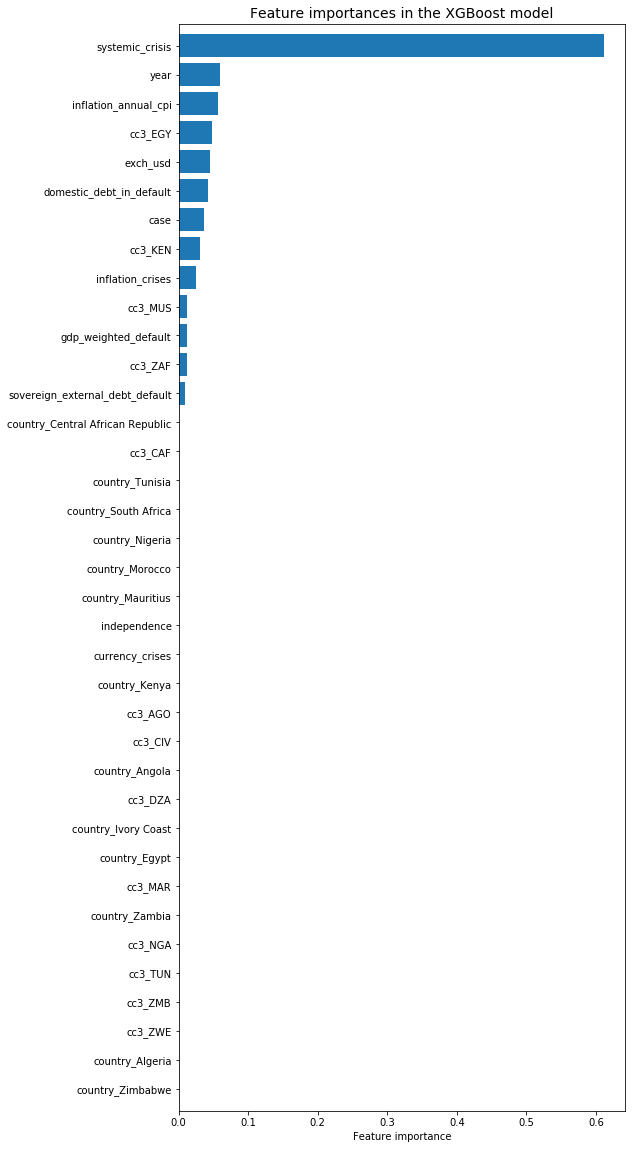

In [40]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()